In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mp
import pylab
from tqdm import trange
import scipy
import statistics
import scipy.stats as stats
from scipy.stats import bernoulli

In [3]:
def is_consensus(x, fix):
    res = True
    count = 0
    for i in range(1, len(x)):
        if x[i-1] != x[i]:
            count += 1
    if count > 2:
        res = False
    return res
def clusters(x0,eps2, fix = {}):
    count = [x0[0]]
    l=0
    for i in range(1,len(x0)):
        if i not in fix:
            for j in range (len(count)):
                if np.abs(x0[i] - count[j])<eps2:
                    l+=1
            if l==0:
                count.append(x0[i])
            l=0
    return np.array(count)

def compare (x ,y, eps):
    result = 1
    for k in range(len(x)):
        if abs(x[k] - y[k]) >= eps:
            result = 0
    return bool(result)

def insert_agent(x, ind):
    if  ind != 0:
        opinion = (x[ind]+x[ind-1])/2
    else:
        opinion = x[ind]
    _X = np.insert(x,ind,opinion)
    return _X

def new_op(x, i, eps):
    count = 1
    summ = x[i]
    for k in range(len(x)):
        if (abs(x[i] - x[k]) < eps) and (i != k):
            #print(i, j, x[i], x[j])
            summ += x[k]
            count += 1
    #print(summ, count)
    return summ/count

def pair_count (x0, fix = {}):
    count = [0, 0]
    for i in range(len(x0)):
        if i not in fix:
            if x0[i] >= 0.5:
                count[0] += 1
            else:
                count[1] += 1
    #count[0] = count[0]/len(x0)
    #count[1] = count[1] / len(x0)
    return count

def Hen_Kr (x0, eps, eps2,fix, v):
    X = [np.array(x0)]
    t = 0
    while True:
        X.append(np.zeros(len(x0)))
        t += 1
        for j in range(len(x0)):
            if j not in fix:
                X[t][j] = new_op(X[t - 1], j, eps)
            else:
                if X[t - 1][j] + v <= 1:
                    X[t][j] = X[t - 1][j] + v
                else:
                    X[t][j] = 1
        if compare(X[t], X[t - 1], eps2):
            break
    return X, t

def find_fix(x0):
    diff = 1
    ind = 0
    for j in range (len(x0)):
        if (x0[j] - 0.5 < diff) and (x0[j] - 0.5 >= 0):
            ind = j
            diff = abs(0.5 - x0[j])
    return ind

In [4]:
def Hen_Kr_actm2_statistics (x0, eps, eps2,fix, v, prob):
    X = [np.array(x0)]
    t = 0
    consensus_value = 0
    consensus_time = 0
    consensus_flag = True
    pos0_6_time = 0
    pos0_6_flag = True
    while True:
        X.append(np.zeros(len(x0)))
        active_mask = bernoulli.rvs(p=prob, size=n)
        t += 1
        for j in range(len(x0)):
            if j not in fix and active_mask[j]==1:
                X_prev = np.copy(X[t -1])
                X_prev[active_mask==0]=0-2*eps - 2*eps2 
                X[t][j] = new_op(X_prev, j, eps)
                X[t][active_mask==0]=X[t-1][active_mask==0]
            else:
                if X[t - 1][j] + v <= 1:
                    X[t][j] = X[t - 1][j] + v
                else:
                    X[t][j] = 1
        if consensus_flag:
            ctrs = clusters(X[t],eps,fix_control)
            if len(ctrs) ==1:
                consensus_flag = False
                consensus_time = t
                consensus_value = X[t][0]
        if pos0_6_flag and np.all(X[t]>= 0.6):
            pos0_6_time = t
            pos0_6_flag = False
        if compare(X[t], X[t - 1], eps2):
            break
    return X, t, consensus_value, consensus_time, pos0_6_time

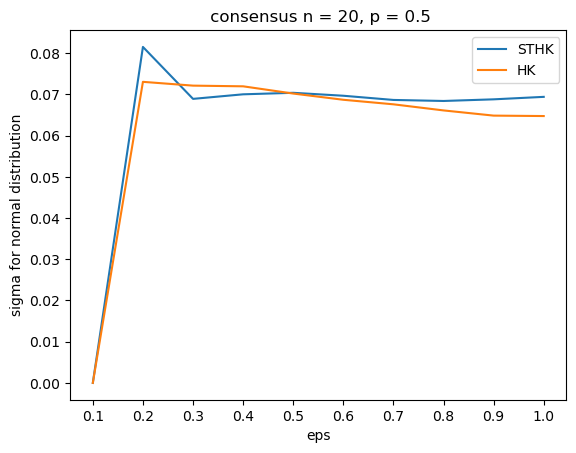

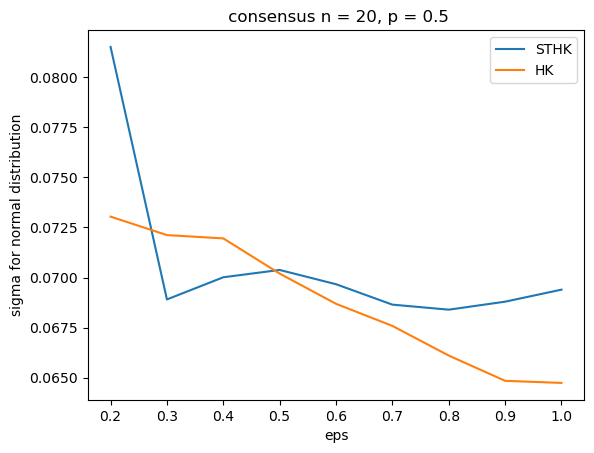

In [4]:
ee = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
clv20 = [np.load(f'con{ee[i]}_20.npy', mmap_mode = 'r') for i in range(len(ee))]
cclv20 = [np.load(f'ccon{ee[i]}_20.npy', mmap_mode = 'r') for i in range(len(ee))]

sigmas=np.array([np.std(clv20[i]) for i in range(len(ee))])

sigmac=np.array([np.std(cclv20[i]) for i in range(len(ee))])

#print('STHK', sigmas, 'HK', sigmac, sep='\n')

plt.plot(ee, sigmas, label='STHK')
plt.plot(ee, sigmac, label='HK')
plt.xticks(ee)
plt.xlabel('eps')
plt.ylabel('sigma for normal distribution')
plt.title(f' consensus n = 20, p = 0.5')
plt.legend()

plt.show()

plt.plot(ee[1:], sigmas[1:], label='STHK')
plt.plot(ee[1:], sigmac[1:], label='HK')
plt.xticks(ee[1:])
plt.xlabel('eps')
plt.ylabel('sigma for normal distribution')
plt.title(f' consensus n = 20, p = 0.5')
plt.legend()

plt.show()

In [5]:
ee = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
nn = [10, 20, 30, 40, 50, 60, 70]

clv = [[np.load(f'con{ee[i]}_{nn[j]}.npy', mmap_mode = 'r') for i in range(len(ee))] for j in range(len(nn))]
cclv = [[np.load(f'ccon{ee[i]}_{nn[j]}.npy', mmap_mode = 'r') for i in range(len(ee))] for j in range(len(nn))]

sigma = np.array([np.array([np.std(clv[j][i]) for i in range(len(ee))]) for j in range(len(nn))])
sigmac = np.array([np.array([np.std(cclv[j][i]) for i in range(len(ee))]) for j in range(len(nn))])

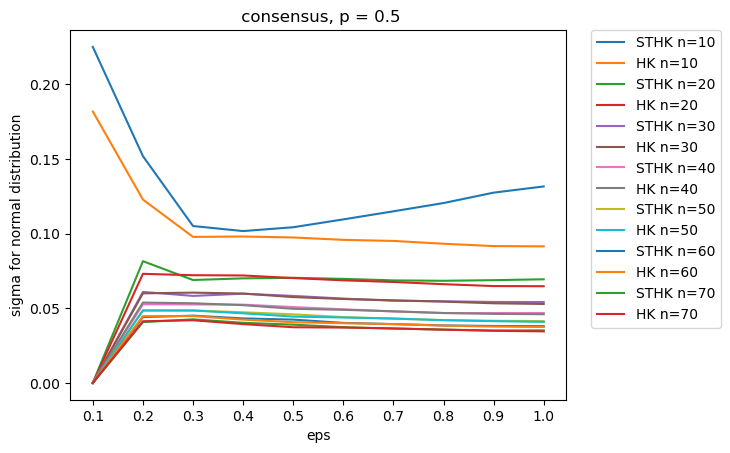

In [6]:
for j in range(len(nn)):
    plt.plot(ee, sigma[j], label=f'STHK n={nn[j]}')
    plt.plot(ee, sigmac[j], label=f'HK n={nn[j]}')
plt.xticks(ee)
plt.xlabel('eps')
plt.ylabel('sigma for normal distribution')
plt.title(f' consensus, p = 0.5')
plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

plt.show()

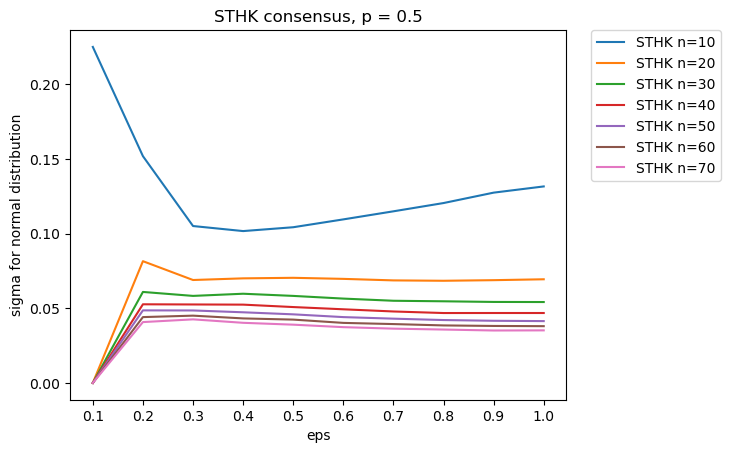

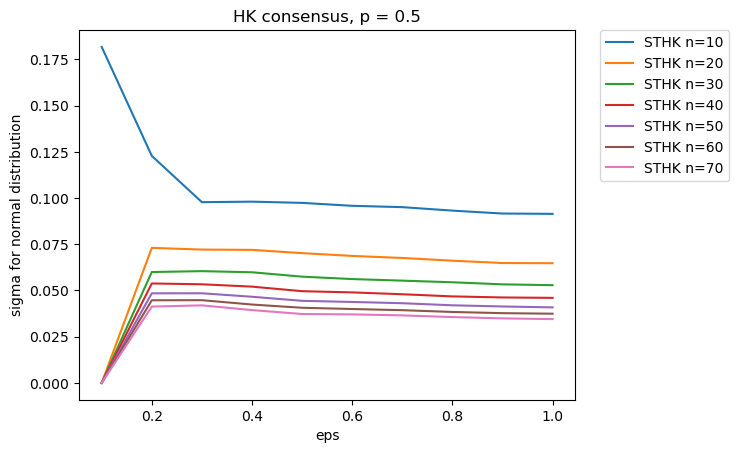

In [7]:
for j in range(len(nn)):
    plt.plot(ee, sigma[j], label=f'STHK n={nn[j]}')

plt.xticks(ee)
plt.xlabel('eps')
plt.ylabel('sigma for normal distribution')
plt.title(f'STHK consensus, p = 0.5')
plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
plt.show()

for j in range(len(nn)):
    plt.plot(ee, sigmac[j], label=f'STHK n={nn[j]}')

plt.xlabel('eps')
plt.ylabel('sigma for normal distribution')
plt.title(f'HK consensus, p = 0.5')
plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

plt.show()

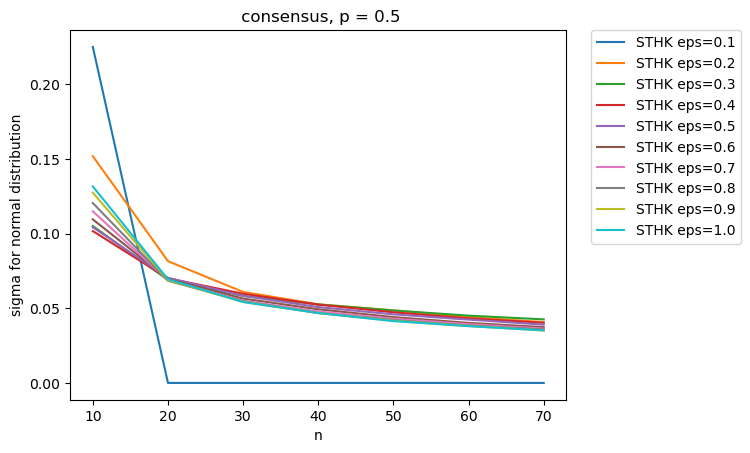

In [8]:
for i in range(len(ee)):
    plt.plot(nn, sigma[:,i], label=f'STHK eps={ee[i]}')
#plt.xticks(nn)
plt.xlabel('n')
plt.ylabel('sigma for normal distribution')
plt.title(f' consensus, p = 0.5')

plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
plt.show()

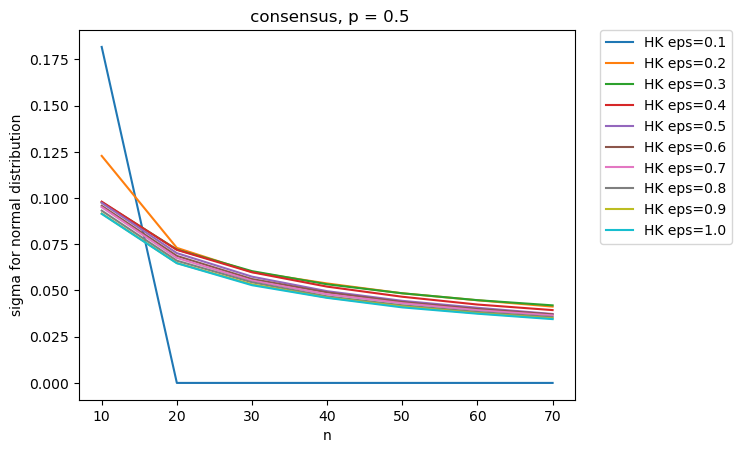

In [9]:
for i in range(len(ee)):
    plt.plot(nn, sigmac[:,i], label=f'HK eps={ee[i]}')
#plt.xticks(nn)
plt.xlabel('n')
plt.ylabel('sigma for normal distribution')
plt.title(f' consensus, p = 0.5')

plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
plt.show()

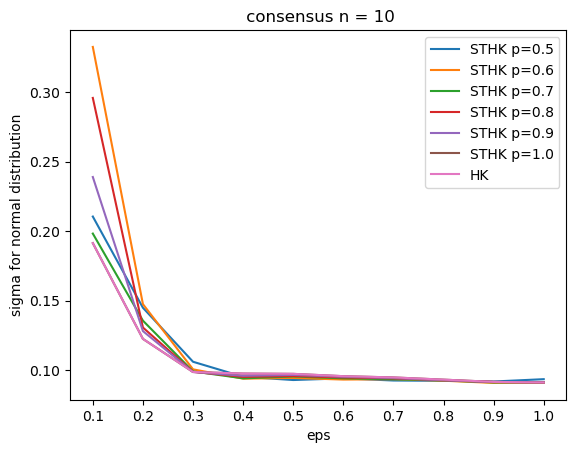

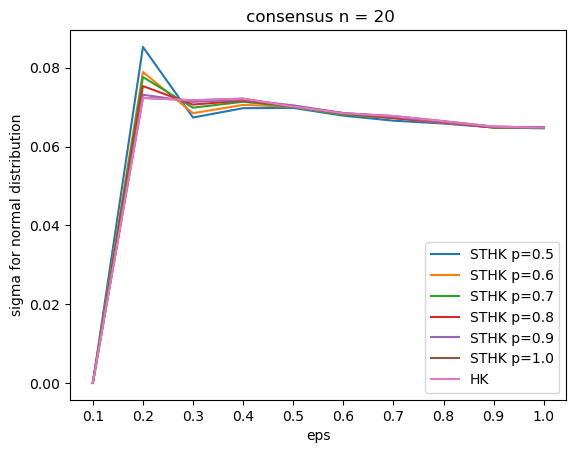

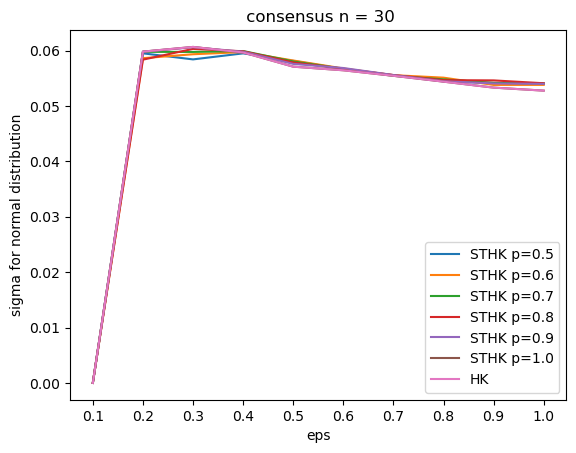

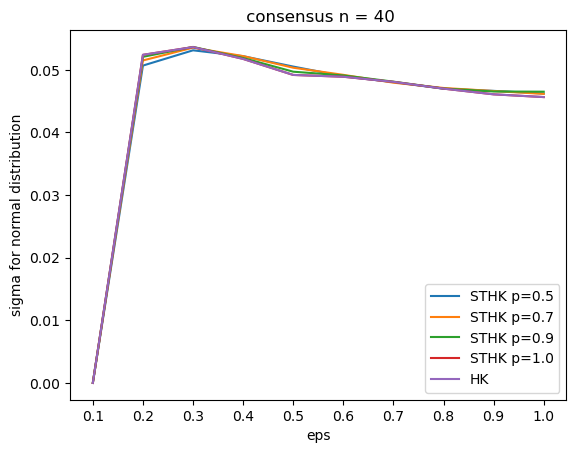

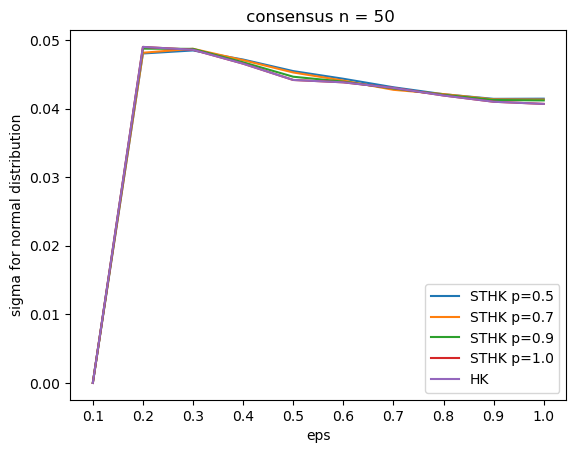

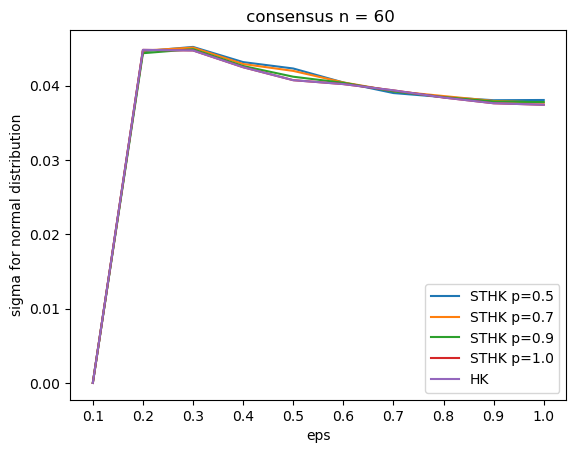

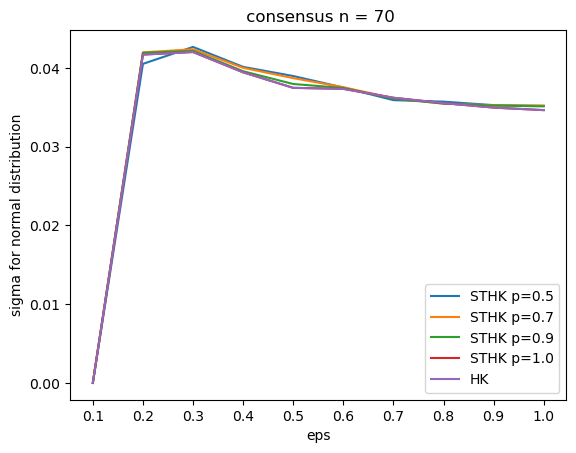

In [6]:
ee = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
pp = np.array([0.5,0.6, 0.7, 0.8, 0.9, 1.])
nn = np.array([10,20,30])
for n in nn:
    data = np.array([np.load(f'pcon{ee[i]}_{n}.npy', allow_pickle=True) for i in range(len(ee))])
    clv = data.copy()
    data = np.array([np.load(f'pccon{ee[i]}_{n}.npy', allow_pickle=True) for i in range(len(ee))], dtype=object)
    cclv = data.copy()

    sigmac=np.array([np.std(cclv[i]) for i in range(len(ee))])

    #print('HK', sigmac, sep='\n')

    for p in range (pp.shape[0]):
        sigmas=np.array([np.std(clv[i,p]) for i in range(len(ee))])
        plt.plot(ee, sigmas, label=f'STHK p={pp[p]}')
        #print(f'STHK p={pp[p]}', sigmas, sep='\n')
    plt.plot(ee, sigmac, label='HK')
    plt.xticks(ee)
    plt.xlabel('eps')
    plt.ylabel('sigma for normal distribution')
    plt.title(f' consensus n = {n}')
    plt.legend()

    plt.show()
pp = np.array([0.5, 0.7, 0.9, 1.])
nn = np.array([40, 50, 60, 70])
for n in nn:
    data = np.array([np.load(f'pcon{ee[i]}_{n}.npy', allow_pickle=True) for i in range(len(ee))])
    clv = data.copy()
    data = np.array([np.load(f'pccon{ee[i]}_{n}.npy', allow_pickle=True) for i in range(len(ee))], dtype=object)
    cclv = data.copy()

    sigmac=np.array([np.std(cclv[i]) for i in range(len(ee))])

    #print('HK', sigmac, sep='\n')

    for p in range (pp.shape[0]):
        sigmas=np.array([np.std(clv[i,p]) for i in range(len(ee))])
        plt.plot(ee, sigmas, label=f'STHK p={pp[p]}')
        #print(f'STHK p={pp[p]}', sigmas, sep='\n')
    plt.plot(ee, sigmac, label='HK')
    plt.xticks(ee)
    plt.xlabel('eps')
    plt.ylabel('sigma for normal distribution')
    plt.title(f' consensus n = {n}')
    plt.legend()

    plt.show()

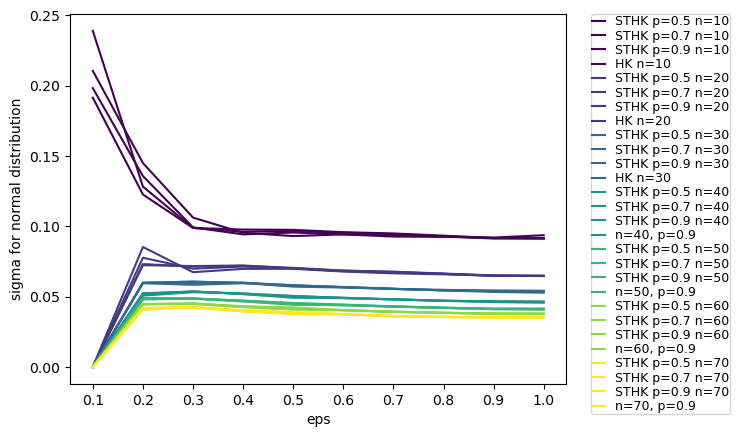

In [88]:
ee = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
pp = np.array([0.5,0.6, 0.7, 0.8, 0.9, 1.])
nn = np.array([10,20,30])
#colors=['blue','purple', 'red', 'orange', 'yellow','green', 'cyan']

cmap='viridis'
cmap = mp.cm.get_cmap(cmap)
norm=plt.Normalize(vmin=10, vmax=70)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

for n in nn:
    data = np.array([np.load(f'pcon{ee[i]}_{n}.npy', allow_pickle=True) for i in range(len(ee))])
    clv = data.copy()
    data = np.array([np.load(f'pccon{ee[i]}_{n}.npy', allow_pickle=True) for i in range(len(ee))], dtype=object)
    cclv = data.copy()

    sigmac=np.array([np.std(cclv[i]) for i in range(len(ee))])

    #print('HK', sigmac, sep='\n')

    for p in range (0,pp.shape[0],2):
        sigmas=np.array([np.std(clv[i,p]) for i in range(len(ee))])
        plt.plot(ee, sigmas, label=f'STHK p={pp[p]} n={n}', color=cmap(norm(n)))
        #print(f'STHK p={pp[p]}', sigmas, sep='\n')
    plt.plot(ee, sigmac, label=f'HK n={n}', color=cmap(norm(n)))
    
pp = np.array([0.5, 0.7, 0.9, 1.])
nn = np.array([40, 50, 60, 70])
for n in nn:
    data = np.array([np.load(f'pcon{ee[i]}_{n}.npy', allow_pickle=True) for i in range(len(ee))])
    clv = data.copy()
    data = np.array([np.load(f'pccon{ee[i]}_{n}.npy', allow_pickle=True) for i in range(len(ee))], dtype=object)
    cclv = data.copy()

    sigmac=np.array([np.std(cclv[i]) for i in range(len(ee))])

    #print('HK', sigmac, sep='\n')

    for p in range (pp.shape[0]-1):
        sigmas=np.array([np.std(clv[i,p]) for i in range(len(ee))])
        plt.plot(ee, sigmas, label=f'STHK p={pp[p]} n={n}', color=cmap(norm(n)))
        #print(f'STHK p={pp[p]}', sigmas, sep='\n')
    plt.plot(ee, sigmac, label=f'n={n}, p={pp[p]}', color=cmap(norm(n)))

pp = np.array([0.1, 0.2, 0.3, 0.4])
nn = np.array([10, 20, 30])
    
plt.xticks(ee)
plt.xlabel('eps')
plt.ylabel('sigma for normal distribution')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., handlelength=1, borderpad=0.1, labelspacing=0.1, fontsize=9)
#clb=plt.colorbar(sm, cmap=cmap, ticks=np.arange(10,80,10))
#clb.set_label(label=' n', rotation=0., loc='center')
plt.show()

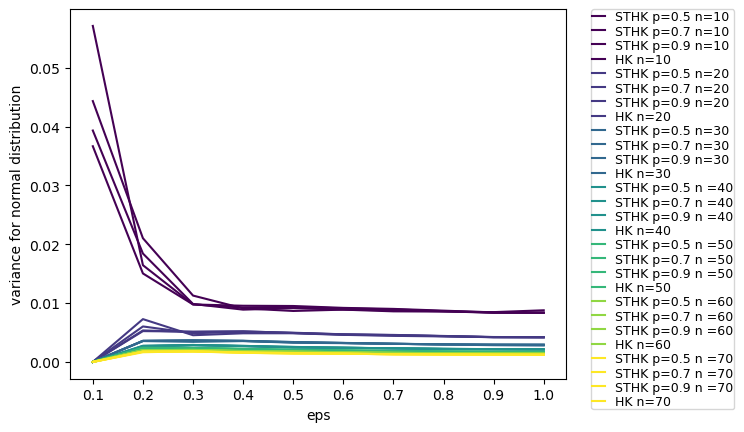

In [89]:
ee = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
pp = np.array([0.5,0.6, 0.7, 0.8, 0.9, 1.])
nn = np.array([10,20,30])
#colors=['blue','purple', 'red', 'orange', 'yellow','green', 'cyan']

cmap='viridis'
cmap = mp.cm.get_cmap(cmap)
norm=plt.Normalize(vmin=10, vmax=70)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

for n in nn:
    data = np.array([np.load(f'pcon{ee[i]}_{n}.npy', allow_pickle=True) for i in range(len(ee))])
    clv = data.copy()
    data = np.array([np.load(f'pccon{ee[i]}_{n}.npy', allow_pickle=True) for i in range(len(ee))], dtype=object)
    cclv = data.copy()

    sigmac=np.array([np.std(cclv[i]) for i in range(len(ee))])

    #print('HK', sigmac, sep='\n')

    for p in range (0,pp.shape[0],2):
        sigmas=np.array([np.std(clv[i,p]) for i in range(len(ee))])
        plt.plot(ee, sigmas**2, label=f'STHK p={pp[p]} n={n}', color=cmap(norm(n)))
        #print(f'STHK p={pp[p]}', sigmas, sep='\n')
    plt.plot(ee, sigmac**2, label=f'HK n={n}', color=cmap(norm(n)))
pp = np.array([0.5, 0.7, 0.9, 1.])
nn = np.array([40, 50, 60, 70])
for n in nn:
    data = np.array([np.load(f'pcon{ee[i]}_{n}.npy', allow_pickle=True) for i in range(len(ee))])
    clv = data.copy()
    data = np.array([np.load(f'pccon{ee[i]}_{n}.npy', allow_pickle=True) for i in range(len(ee))], dtype=object)
    cclv = data.copy()

    sigmac=np.array([np.std(cclv[i]) for i in range(len(ee))])

    #print('HK', sigmac, sep='\n')

    for p in range (pp.shape[0]-1):
        sigmas=np.array([np.std(clv[i,p]) for i in range(len(ee))])
        plt.plot(ee, sigmas**2, label=f'STHK p={pp[p]} n ={n}', color=cmap(norm(n)))
        #print(f'STHK p={pp[p]}', sigmas, sep='\n')
    plt.plot(ee, sigmac**2, label=f'HK n={n}', color=cmap(norm(n)))

pp = np.array([0.1, 0.2, 0.3, 0.4])
nn = np.array([10, 20, 30])
"""for n in nn:
    data = np.array([np.load(f'ppcon{ee[i]}_{n}.npy', allow_pickle=True) for i in range(len(ee))])
    clv = data.copy()
    data = np.array([np.load(f'ppccon{ee[i]}_{n}.npy', allow_pickle=True) for i in range(len(ee))], dtype=object)
    cclv = data.copy()

    #sigmac=np.array([np.std(cclv[i]) for i in range(len(ee))])

    for p in range (pp.shape[0]):
        sigmas=np.array([np.std(clv[i,p]) for i in range(len(ee))])
        plt.plot(ee, sigmas, label=f'STHK p={pp[p]} n={n}', color=colors[n//10 -1])
        #print(f'STHK p={pp[p]}', sigmas, sep='\n')"""
    
plt.xticks(ee)
plt.xlabel('eps')
plt.ylabel('variance for normal distribution')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., handlelength=1, borderpad=0.1, labelspacing=0.1, fontsize=9)
#clb=plt.colorbar(sm, cmap=cmap, ticks=np.arange(10,80,10))
#clb.set_label(label=' n', rotation=0., loc='center')
plt.show()

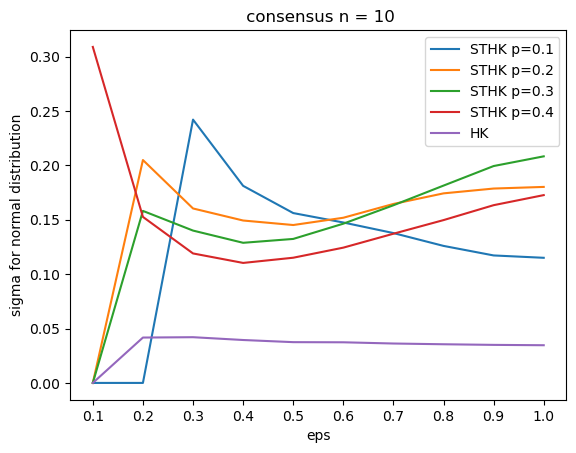

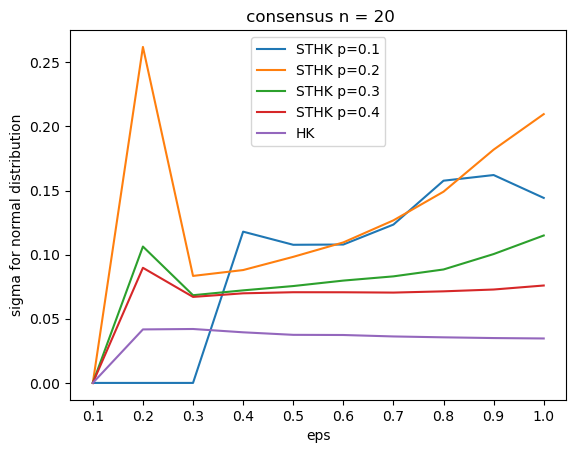

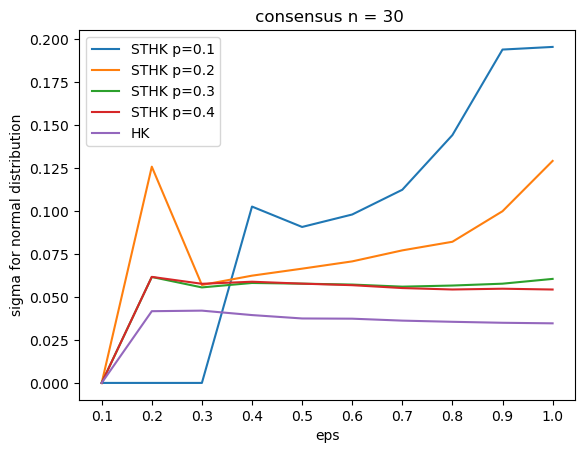

In [12]:
pp = np.array([0.1, 0.2, 0.3, 0.4])
nn = np.array([10, 20, 30])
for n in nn:
    data = np.array([np.load(f'ppcon{ee[i]}_{n}.npy', allow_pickle=True) for i in range(len(ee))])
    clv = data.copy()
    data = np.array([np.load(f'ppccon{ee[i]}_{n}.npy', allow_pickle=True) for i in range(len(ee))], dtype=object)
    cclv = data.copy()

    #sigmac=np.array([np.std(cclv[i]) for i in range(len(ee))])

    for p in range (pp.shape[0]):
        sigmas=np.array([np.std(clv[i,p]) for i in range(len(ee))])
        plt.plot(ee, sigmas, label=f'STHK p={pp[p]}')
        #print(f'STHK p={pp[p]}', sigmas, sep='\n')
    plt.plot(ee, sigmac, label='HK')
    plt.xticks(ee)
    plt.xlabel('eps')
    plt.ylabel('sigma for normal distribution')
    plt.title(f' consensus n = {n}')
    plt.legend()

    plt.show()

[0.         0.56455317 0.41864523 ... 0.77467829 0.49027306 0.39624765]
среднекв отклонение 0.0951683451941076, дисперсия 0.009057013926984825, мат ожидание 0.4995785078180219


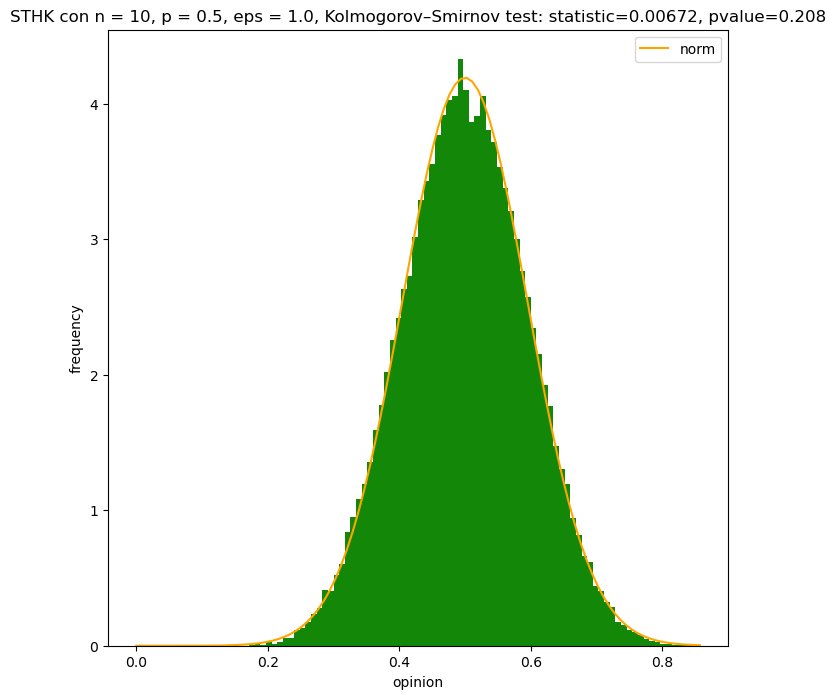

In [41]:
data = np.array([np.load(f'pcon0.7_10.npy', allow_pickle=True)])
clv = data.copy()
print(clv[0, 1])
clv0250=clv[0, -1]
clv0250=sorted(clv0250)
mu = np.mean(clv0250)
sigma = np.std(clv0250) 
print(f'среднекв отклонение {sigma}, дисперсия {sigma**2}, мат ожидание {mu}')

st, pv=stats.ks_2samp(stats.norm.rvs(mu,sigma, size=len(np.array(clv0250))),np.array(clv0250), mode='auto')
fig = plt.figure(facecolor='white', figsize=(8, 8))
hist = plt.hist(np.array(clv0250), density = True, bins=100, stacked = True, color = '#138808')
x = np.linspace(hist[1].min(), hist[1].max(), num=100)

plt.plot(x, stats.norm.pdf(x,mu,sigma), color ="orange", label='norm')
plt.xlabel('opinion')
plt.ylabel('frequency')
plt.title(f'STHK con n = 10, p = 0.5, eps = 1.0, Kolmogorov–Smirnov test: statistic={st:.3}, pvalue={pv:.3}')
plt.legend()

plt.show()